## Mini project 4: Attitude 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('attitude.csv')
data.head()

,rating,complaints,privileges,learning,raises,critical,advance
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [3]:
data.tail()

,rating,complaints,privileges,learning,raises,critical,advance
25,66,77,66,63,88,76,72
26,78,75,58,74,80,78,49
27,48,57,44,45,51,83,38
28,85,85,71,71,77,74,55
29,82,82,39,59,64,78,39


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   rating      30 non-null     int64
 1   complaints  30 non-null     int64
 2   privileges  30 non-null     int64
 3   learning    30 non-null     int64
 4   raises      30 non-null     int64
 5   critical    30 non-null     int64
 6   advance     30 non-null     int64
dtypes: int64(7)
memory usage: 1.8 KB


In [5]:
data.describe()

,rating,complaints,privileges,learning,raises,critical,advance
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,64.633333,66.600000,53.133333,56.366667,64.633333,74.766667,42.933333
std,12.172562,13.314757,12.235430,11.737013,10.397226,9.894908,10.288706
min,40.000000,37.000000,30.000000,34.000000,43.000000,49.000000,25.000000
25%,58.750000,58.500000,45.000000,47.000000,58.250000,69.250000,35.000000
50%,65.500000,65.000000,51.500000,56.500000,63.500000,77.500000,41.000000
75%,71.750000,77.000000,62.500000,66.750000,71.000000,80.000000,47.750000
max,85.000000,90.000000,83.000000,75.000000,88.000000,92.000000,72.000000


In [6]:
#Kiểm tra có giá trị null hay không
data.isnull().sum()

rating        0
complaints    0
privileges    0
learning      0
raises        0
critical      0
advance       0
dtype: int64

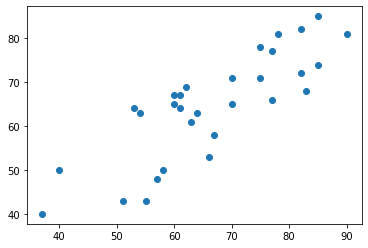

In [7]:
#1. Vẽ biểu đồ giữa complaints và rating
plt.scatter(data.complaints.values,data.rating.values)

Nhận xét: Dường như mức độ complaint và rating có quan hệ tuyến tính với nhau. Theo biểu đồ cho thấy, mức độ complaint và rating có tỷ lệ thuận với nhau.

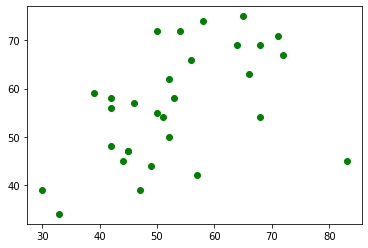

In [8]:
#2. Vẽ biểu đồ giữa privileges và learning
plt.scatter(data.privileges.values,data.learning.values, color='green')

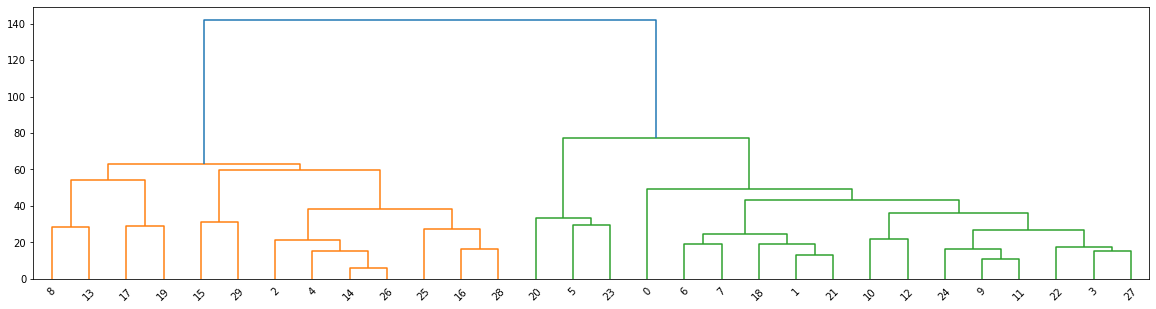

In [9]:
#3 Áp dụng thuật toán:
df = data[['privileges','learning']].values
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (20, 5))
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [10]:
# Thấy rằng cluster = 5
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit(df)

AgglomerativeClustering(n_clusters=5)

In [11]:
cluster.labels_

array([4, 2, 0, 3, 2, 3, 2, 2, 0, 3, 2, 3, 3, 1, 0, 0, 0, 0, 2, 1, 4, 2,
       2, 2, 3, 0, 0, 3, 0, 2])

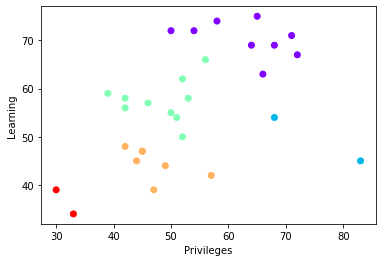

In [12]:
plt.scatter(df[:,0], df[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Privileges")
plt.ylabel("Learning")
plt.show()

6. Nhận xét: Nhìn vào phân nhóm biểu đồ cho thấy chia thành 5 nhóm (tăng theo mức độ của việc học và đặc quyền).